In [4]:
import math
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

In [10]:
path = "https://raw.githubusercontent.com/adamastor1/cholesterol-heart-disease-relationship/main/heart.csv"

heart = pd.read_csv(path)

In [11]:
#take a look at the dataset

heart.info()

heart.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3,1
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1
9,57,1,2,150,168,0,1,174,0,1.6,2,0,2,1


In [ ]:
# split up the dataset

hd_yes = heart[(heart['target'] == 1)]
hd_yes.info()

hd_no = heart[(heart['target'] == 0)]
hd_no.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 165 entries, 0 to 164
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       165 non-null    int64  
 1   sex       165 non-null    int64  
 2   cp        165 non-null    int64  
 3   trestbps  165 non-null    int64  
 4   chol      165 non-null    int64  
 5   fbs       165 non-null    int64  
 6   restecg   165 non-null    int64  
 7   thalach   165 non-null    int64  
 8   exang     165 non-null    int64  
 9   oldpeak   165 non-null    float64
 10  slope     165 non-null    int64  
 11  ca        165 non-null    int64  
 12  thal      165 non-null    int64  
 13  target    165 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 19.3 KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 138 entries, 165 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       138 non-null    int

In [ ]:
#Looks like we have plenty enough patients in each sample to run a t-test

#Set to carry on with the analysis

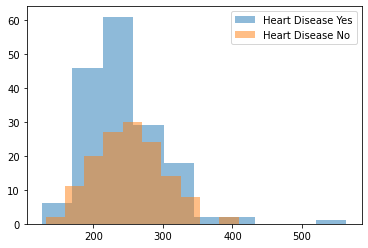

In [ ]:
#Using matplotlib.pyplot we can plot histograms of each sample to visually observe how normal the distribution is

#By setting alpha = .5, the transparency of each histogram is reduced so we can more easily make out overlapping areas

plt.hist(hd_yes['chol'], alpha = .5, label = "Heart Disease Yes")
plt.hist(hd_no['chol'], alpha = .5, label = "Heart Disease No")
plt.legend(loc="upper right")
plt.show()

In [ ]:
#These distributions look normal, but there seems to be some outlying data that includes some misleading values

#The histogram has plotted some values of Cholesterol above 500

#This is a small selection of the data, so we are safe to simply drop it and proceed with the analysis

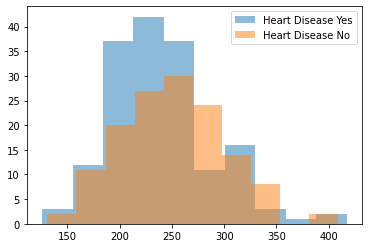

In [ ]:
hd_yes_filtered = hd_yes[hd_yes['chol']< 500]
hd_no_filtered = hd_no[hd_no['chol']< 500]

plt.hist(hd_yes_filtered['chol'], alpha = .5, label = "Heart Disease Yes")
plt.hist(hd_no_filtered['chol'], alpha = .5, label = "Heart Disease No")
plt.legend(loc="upper right")
plt.show()

In [ ]:
#Looks much cleaner, now let's check the skewness and kurtosis

print(stats.describe(hd_yes_filtered['chol']))
print(stats.describe(hd_no_filtered['chol']))

DescribeResult(nobs=164, minmax=(126, 417), mean=240.26829268292684, variance=2246.442914858597, skewness=0.7095497427594998, kurtosis=1.0086000089276324)
DescribeResult(nobs=138, minmax=(131, 409), mean=251.08695652173913, variance=2445.758806728023, skewness=0.3129523951358052, kurtosis=0.31842990435273677)


In [ ]:
#The skewness for both is between -3 and 3 and the kurtosis for both is between -3 and 3

#The distributions can be statistically confirmed to be considered normal

#Since the data meets our assumptions, let's proceed to the t-test

In [ ]:
#Our two arguments will be the two arrays representing the cholesterol levels of patients with and without heart disease

stats.ttest_ind(hd_yes_filtered['chol'], hd_no_filtered['chol'])

Ttest_indResult(statistic=-1.937131805169153, pvalue=0.05366782242225865)

In [ ]:
#We know we can reject the null from either of these two results:

#1. The test statistic is greater than 1.96

#2. The p-value is less than .05

In [ ]:
#We will round up the test statistic to 1.94 and the p-value to .054

#Both of which do not meet the requirement to reject the null hypothesis, so we are forced to accept the null hypothesis

In [ ]:
#Since the outcome of the t-test was very close to supporting the alternate hypothesis,

#we will create a pointplot to visualize how close the samples are

In [ ]:
import seaborn as sns

[[Text(0, 0, 'Heart Disease Yes'), Text(0, 0, 'Heart Disease No')]]

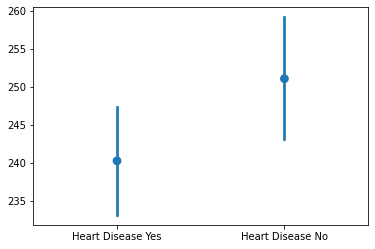

In [ ]:
h = sns.pointplot(data=[hd_yes_filtered['chol'],
                        hd_no_filtered['chol']], join=False)

h.set(xticklabels = ['Heart Disease Yes', 'Heart Disease No'])

In [ ]:
#As the pointplot visualiztion confirms, the difference in cholesterol level between

#people that have heart disease and those that don't is on average about 12 mg/dl

In [ ]:
#This is not a very significant difference and confirms the null hypothesis which states

#Uo: There is not a significant difference between the two populations associated
#with cholesterol levels and heart disease